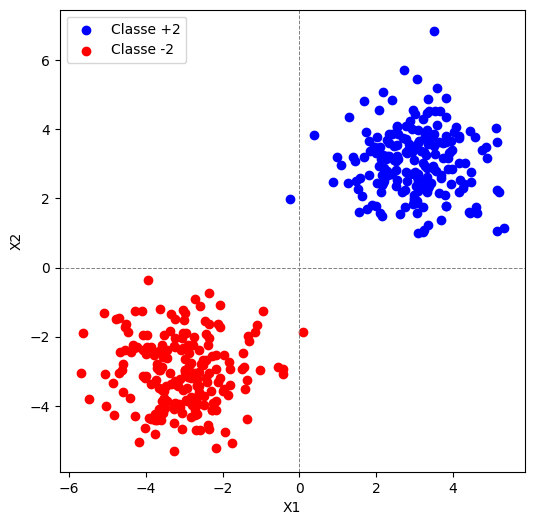

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_samples = 200

class1 = np.random.randn(n_samples, 2) + 3
class2 = np.random.randn(n_samples, 2) - 3


plt.figure(figsize=(6, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='blue', label='Classe +2')
plt.scatter(class2[:, 0], class2[:, 1], color='red', label='Classe -2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

        -1.0       1.00      1.00      1.00        58
         1.0       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



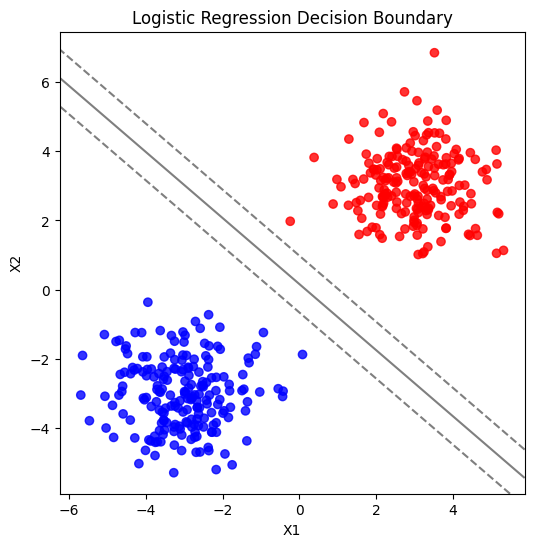

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = np.vstack((class1, class2))
y = np.vstack((np.ones((n_samples, 1)), -np.ones((n_samples, 1)))).ravel()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Optional: Visualize the decision boundary
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.8)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Plot support vectors
# ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k') # Not applicable for Logistic Regression

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Logistic Regression Decision Boundary")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.9916666746139526
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


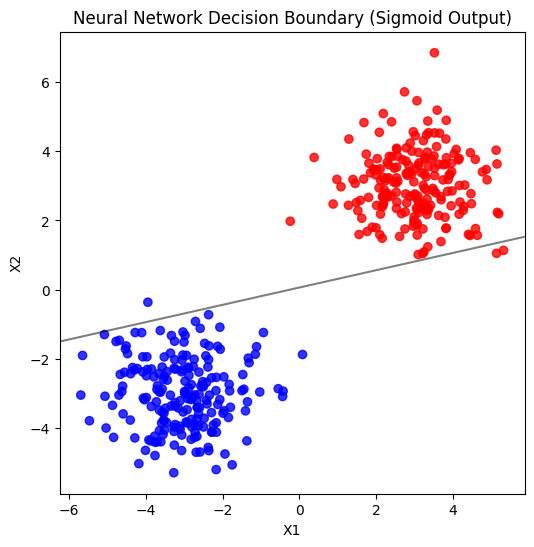

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data (already done in the previous cell but redefining for clarity)
X = np.vstack((class1, class2))
y = np.vstack((np.ones((n_samples, 1)), np.zeros((n_samples, 1)))).ravel() # Use 0 and 1 for binary crossentropy

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a simple neural network model
model_nn = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)) # Sigmoid output for binary classification
])

# Compile the model
model_nn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the model
loss, accuracy_nn = model_nn.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Accuracy: {accuracy_nn}")

# Optional: Visualize the decision boundary (similar to the previous cell)
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predict using the neural network model for visualization
Z_nn = model_nn.predict(xy).reshape(XX.shape)

ax.contour(XX, YY, Z_nn, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Neural Network Decision Boundary (Sigmoid Output)")
plt.show()

Neural Network with ReLU Accuracy: 1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


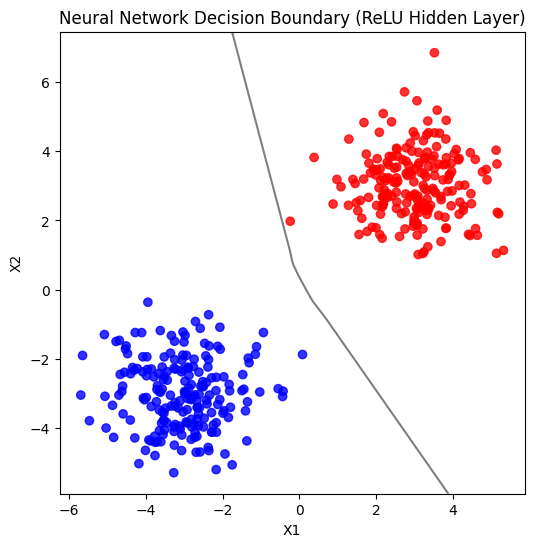

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data (using the same data as before)
X = np.vstack((class1, class2))
y = np.vstack((np.ones((n_samples, 1)), np.zeros((n_samples, 1)))).ravel() # Use 0 and 1 for binary crossentropy

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a simple neural network model with a ReLU hidden layer
model_nn_relu = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Hidden layer with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with Sigmoid activation for binary classification
])

# Compile the model
model_nn_relu.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_relu = model_nn_relu.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the model
loss_relu, accuracy_nn_relu = model_nn_relu.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network with ReLU Accuracy: {accuracy_nn_relu}")

# Optional: Visualize the decision boundary
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predict using the new model for visualization
Z_nn_relu = model_nn_relu.predict(xy).reshape(XX.shape)

ax.contour(XX, YY, Z_nn_relu, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Neural Network Decision Boundary (ReLU Hidden Layer)")
plt.show()

Neural Network with ReLU for Classification Accuracy: 1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


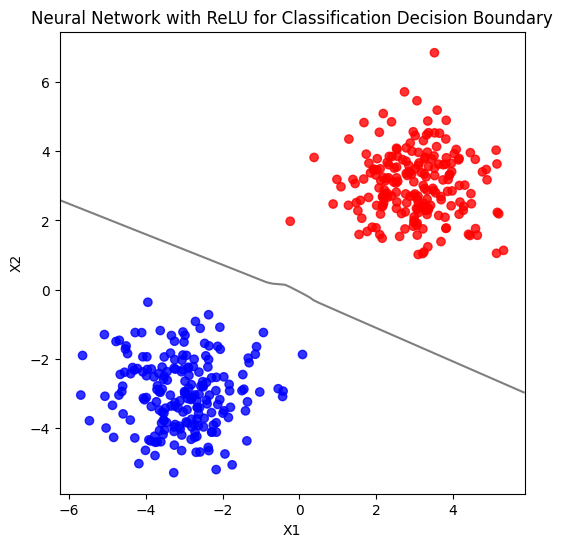

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare the data (using the same data as before)
X = np.vstack((class1, class2))
y = np.vstack((np.ones((n_samples, 1)), np.zeros((n_samples, 1)))).ravel() # Use 0 and 1 for binary crossentropy

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a simple neural network model with a ReLU hidden layer
model_relu_classification = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)), # Hidden layer with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with Sigmoid activation for binary classification
])

# Compile the model
model_relu_classification.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_relu_classification = model_relu_classification.fit(X_train, y_train, epochs=50, verbose=0)

# Evaluate the model
loss_relu_classification, accuracy_relu_classification = model_relu_classification.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network with ReLU for Classification Accuracy: {accuracy_relu_classification}")

# Optional: Visualize the decision boundary
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Predict using the new model for visualization
Z_relu_classification = model_relu_classification.predict(xy).reshape(XX.shape)

ax.contour(XX, YY, Z_relu_classification, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Neural Network with ReLU for Classification Decision Boundary")
plt.show()

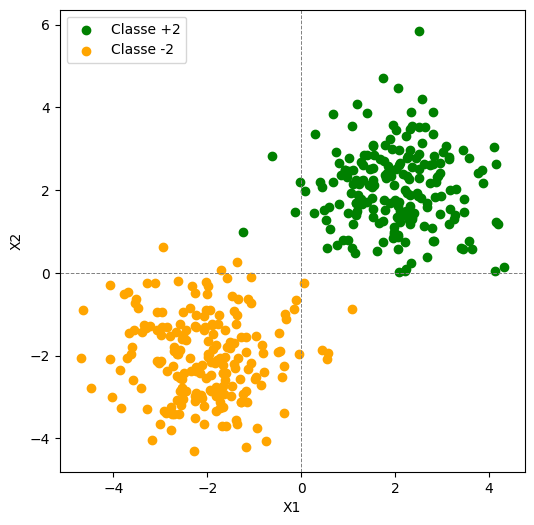

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

n_samples = 200

class3 = np.random.randn(n_samples, 2) + 2
class4 = np.random.randn(n_samples, 2) - 2
plt.figure(figsize=(6, 6))
plt.scatter(class3[:, 0], class3[:, 1], color='green', label='Classe +2')
plt.scatter(class4[:, 0], class4[:, 1], color='orange', label='Classe -2')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.legend()
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network with Sigmoid Accuracy (New Data): 1.0
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


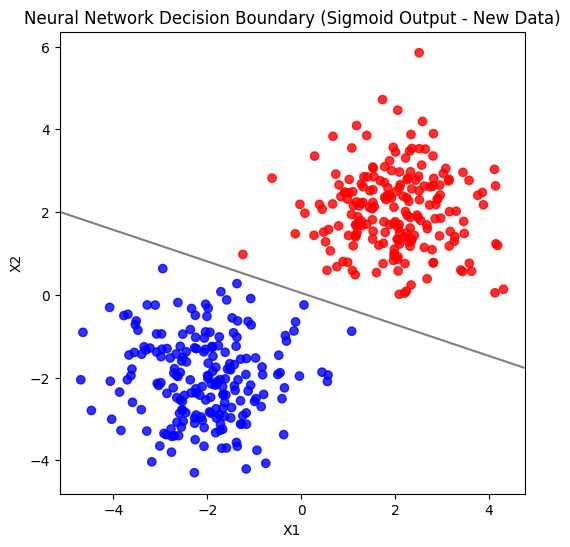

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data
X_new = np.vstack((class3, class4))
y_new = np.vstack((np.ones((n_samples, 1)), np.zeros((n_samples, 1)))).ravel() # Use 0 and 1 for binary crossentropy

# Split data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Build a simple neural network model with sigmoid activation
model_sigmoid_new = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train_new.shape[1],)) # Sigmoid output for binary classification
])

# Compile the model
model_sigmoid_new.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# Train the model
history_sigmoid_new = model_sigmoid_new.fit(X_train_new, y_train_new, epochs=50, verbose=0)

# Evaluate the model
loss_sigmoid_new, accuracy_sigmoid_new = model_sigmoid_new.evaluate(X_test_new, y_test_new, verbose=0)
print(f"Neural Network with Sigmoid Accuracy (New Data): {accuracy_sigmoid_new}")

# Visualize the decision boundary
plt.figure(figsize=(6, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap='bwr', alpha=0.8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy_new = np.vstack([XX.ravel(), YY.ravel()]).T

Z_sigmoid_new = model_sigmoid_new.predict(xy_new).reshape(XX.shape)

ax.contour(XX, YY, Z_sigmoid_new, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Neural Network Decision Boundary (Sigmoid Output - New Data)")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network with ReLU Accuracy (New Data): 0.9833333492279053
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


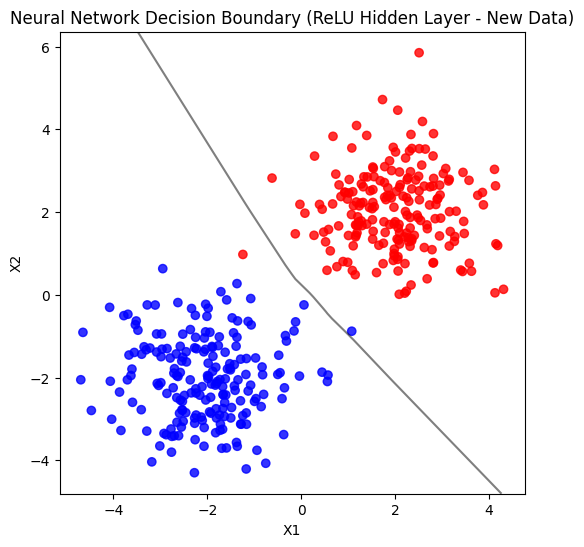

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare the data (using the same data as before)
X_new = np.vstack((class3, class4))
y_new = np.vstack((np.ones((n_samples, 1)), np.zeros((n_samples, 1)))).ravel() # Use 0 and 1 for binary crossentropy

# Split data into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

# Build a simple neural network model with a ReLU hidden layer
model_relu_new = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_new.shape[1],)), # Hidden layer with ReLU activation
    Dense(1, activation='sigmoid') # Output layer with Sigmoid activation for binary classification
])

# Compile the model
model_relu_new.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

# Train the model
history_relu_new = model_relu_new.fit(X_train_new, y_train_new, epochs=50, verbose=0)

# Evaluate the model
loss_relu_new, accuracy_relu_new = model_relu_new.evaluate(X_test_new, y_test_new, verbose=0)
print(f"Neural Network with ReLU Accuracy (New Data): {accuracy_relu_new}")

# Optional: Visualize the decision boundary
plt.figure(figsize=(6, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap='bwr', alpha=0.8)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy_new = np.vstack([XX.ravel(), YY.ravel()]).T

# Predict using the new model for visualization
Z_relu_new = model_relu_new.predict(xy_new).reshape(XX.shape)

ax.contour(XX, YY, Z_relu_new, colors='k', levels=[0.5], alpha=0.5, linestyles=['-'])

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Neural Network Decision Boundary (ReLU Hidden Layer - New Data)")
plt.show()

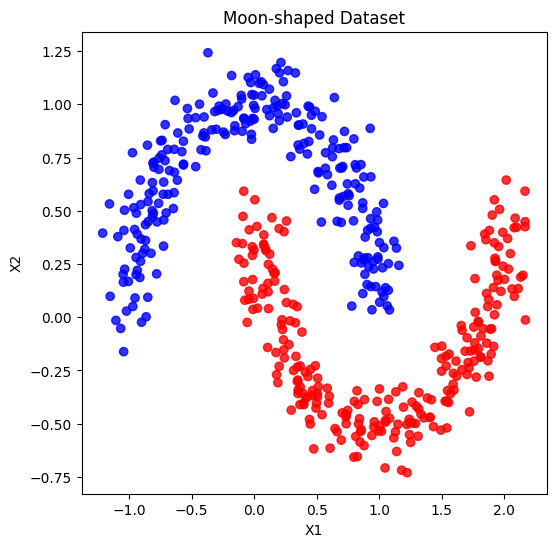

In [19]:
from sklearn.datasets import make_moons

# Generate moon-shaped data
X_moon, y_moon = make_moons(n_samples=500, noise=0.1, random_state=42)

# Visualize the moon-shaped data
plt.figure(figsize=(6, 6))
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_moon, cmap='bwr', alpha=0.8)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Moon-shaped Dataset")
plt.show()

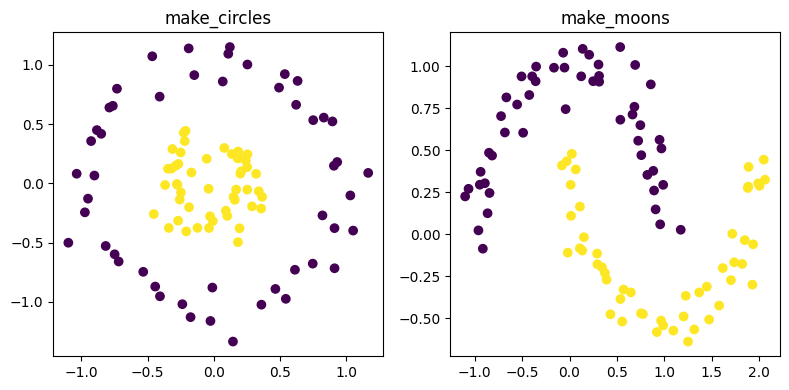

In [17]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

X, Y = make_circles(noise=0.1, factor=0.3, random_state=0)
ax1.scatter(X[:, 0], X[:, 1], c=Y)
ax1.set_title("make_circles")

X, Y = make_moons(noise=0.1, random_state=0)
ax2.scatter(X[:, 0], X[:, 1], c=Y)
ax2.set_title("make_moons")

plt.tight_layout()
plt.show()

Accuracy on make_circles: 1.00
Accuracy on make_moons: 1.00


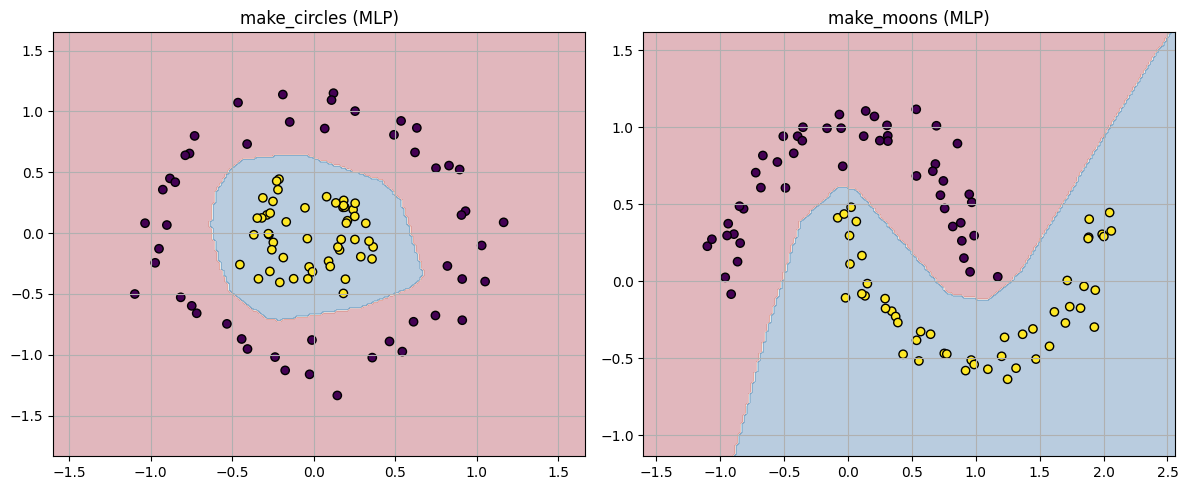

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_moons
from sklearn.neural_network import MLPClassifier

# ----------------------------
# Fonction pour tracer la frontière
# ----------------------------
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.grid(True)

# ----------------------------
# Datasets
# ----------------------------
datasets = {
    "make_circles": make_circles(noise=0.1, factor=0.3, random_state=0),
    "make_moons": make_moons(noise=0.1, random_state=0)
}

# ----------------------------
# Créer figure
# ----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for (name, (X, y)), ax in zip(datasets.items(), [ax1, ax2]):
    # MLPClassifier
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu',
                        solver='adam', max_iter=2000, random_state=42)
    mlp.fit(X, y)

    # Afficher précision
    acc = mlp.score(X, y)
    print(f"Accuracy on {name}: {acc:.2f}")

    # Tracer frontière
    plot_decision_boundary(mlp, X, y, ax, f"{name} (MLP)")

plt.tight_layout()
plt.show()

Logistic Regression Accuracy on Moon Data: 0.8733333333333333
Neural Network with ReLU Accuracy on Moon Data: 1.0


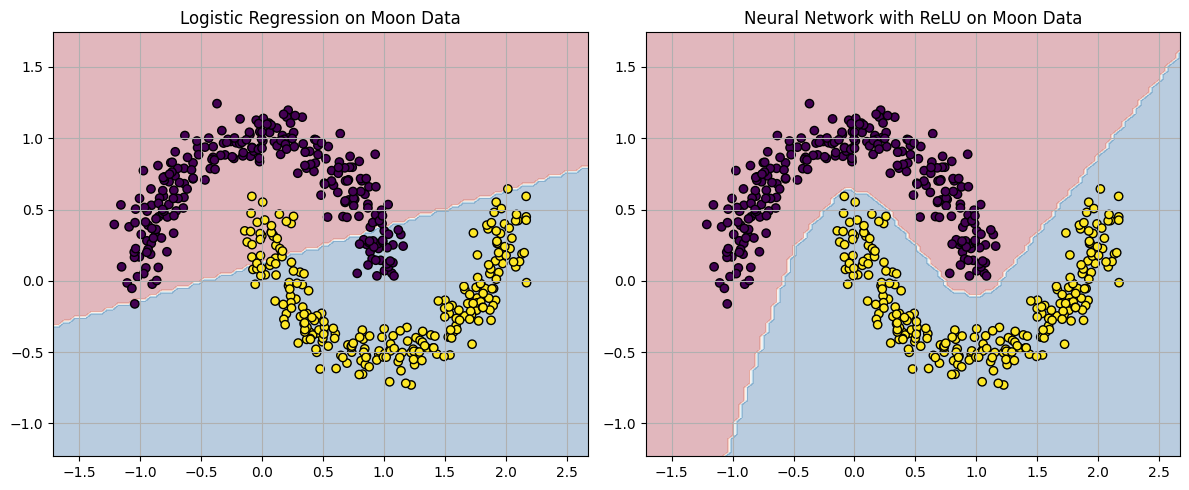

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

# Generate moon-shaped data
X_moon, y_moon = make_moons(n_samples=500, noise=0.1, random_state=42)

# Split data into training and testing sets
X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(X_moon, y_moon, test_size=0.3, random_state=42)

# ----------------------------
# Logistic Regression
# ----------------------------
logistic_model = LogisticRegression()
logistic_model.fit(X_train_moon, y_train_moon)

y_pred_logistic = logistic_model.predict(X_test_moon)
accuracy_logistic = accuracy_score(y_test_moon, y_pred_logistic)
print(f"Logistic Regression Accuracy on Moon Data: {accuracy_logistic}")

# ----------------------------
# Neural Network with ReLU
# ----------------------------
# Using MLPClassifier which defaults to ReLU activation for hidden layers
relu_model = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', solver='adam', max_iter=1000, random_state=42)
relu_model.fit(X_train_moon, y_train_moon)

y_pred_relu = relu_model.predict(X_test_moon)
accuracy_relu = accuracy_score(y_test_moon, y_pred_relu)
print(f"Neural Network with ReLU Accuracy on Moon Data: {accuracy_relu}")

# ----------------------------
# Visualize Decision Boundaries
# ----------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdBu)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax.set_title(title)
    ax.grid(True)

# Plot for Logistic Regression
plot_decision_boundary(logistic_model, X_moon, y_moon, ax1, "Logistic Regression on Moon Data")

# Plot for Neural Network with ReLU
plot_decision_boundary(relu_model, X_moon, y_moon, ax2, "Neural Network with ReLU on Moon Data")

plt.tight_layout()
plt.show()